In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [6]:
train_path = "archive/fruits-360/Training/"
test_path = "archive/fruits-360/Test/"

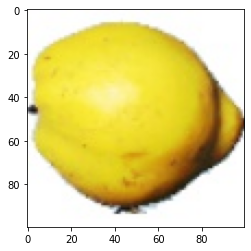

In [47]:
img = load_img(train_path + "Quince/r_305_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [19]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [8]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(131, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)            

In [9]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [31]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 50,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 50)

Epoch 1/50
50/50 [==============================] - 194s 4s/step - loss: 4.6543 - accuracy: 0.0325 - val_loss: 4.4717 - val_accuracy: 0.0544
Epoch 2/50
50/50 [==============================] - 187s 4s/step - loss: 4.3797 - accuracy: 0.0550 - val_loss: 4.1161 - val_accuracy: 0.0944
Epoch 3/50
50/50 [==============================] - 184s 4s/step - loss: 4.1179 - accuracy: 0.0625 - val_loss: 3.7680 - val_accuracy: 0.0831
Epoch 4/50
50/50 [==============================] - 178s 4s/step - loss: 3.8742 - accuracy: 0.0800 - val_loss: 3.5729 - val_accuracy: 0.1213
Epoch 5/50
50/50 [==============================] - 184s 4s/step - loss: 3.6411 - accuracy: 0.1219 - val_loss: 3.5715 - val_accuracy: 0.1163
Epoch 6/50
50/50 [==============================] - 179s 4s/step - loss: 3.4985 - accuracy: 0.1312 - val_loss: 3.1987 - val_accuracy: 0.1437
Epoch 7/50
50/50 [==============================] - 199s 4s/step - loss: 3.2832 - accuracy: 0.1575 - val_loss: 3.1350 - val_accuracy: 0.1950
Epoch 8/50
50

In [38]:
from keras.models import load_model

model.save("Fruitmodel.h5")

In [59]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [50]:
test_generator.classes[22687]

130

In [71]:
predictions = probability_model.predict(test_generator)

In [44]:
b=predictions[8]
print(b)

[0.0075352  0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753528 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.02039565 0.00753518 0.00753518 0.00753782
 0.00753522 0.00753518 0.00753533 0.00753518 0.00753518 0.00753518
 0.00753518 0.007536   0.00753518 0.00753518 0.00753545 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753539 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753518 0.00753518 0.00753518 0.00754054
 0.0075352  0.00753518 0.00753518 0.00753518 0.00753518 0.00753531
 0.00753519 0.00753519 0.00753518 0.00753518 0.00753518 0.00753518
 0.0075352  0.00753518 0.00753518 0.00753518 0.00753518 0.00753518
 0.00753518 0.00753518 0.00753605 0.0075476  0.00753518 0.0075

In [45]:
np.argmax(b)

26

In [46]:
import os

folder = 'archive/fruits-360/Test'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[26])

Cherry 1
